<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Practice: Neural Networks with One Hidden Layer Noisy XOR </font></h1> 


# Table of Contents
In this lab, you will see how many neurons it takes to classify noisy XOR data with one hidden layer neural network.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Helper Functions</a></li>
<li><a href="#ref1">Neural Network Module and Training Function</a></li>
<li><a href="#ref2">Prepare Data</a></li>
<li><a href="#ref3">One Neuron</a></li>
<li><a href="#ref4">Two Neurons</a></li>
<li><a href="#ref5">Three Neurons</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>
<hr>

Import the following libraries:

In [1]:
#!conda install -y torchvision
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.colors import ListedColormap

<a id="ref0"></a>
<h2 align=center>Helper Functions</h2>

Use the following function to plot the data: 

In [2]:
def  plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
    X=data_set.x.numpy()
    y=data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min()-0.1 , X[:, 0].max()+0.1 
    y_min, y_max = X[:, 1].min()-0.1 , X[:, 1].max() +0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX=torch.torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat=np.logical_not((model(XX)[:,0]>0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:,0]==0,0],X[y[:,0]==0,1],'o',label='y=0')
    plt.plot(X[y[:,0]==1,0],X[y[:,0]==1,1],'ro',label='y=1')
    plt.title("decision region")
    plt.legend()

Use the following function to calculate accuracy: 

In [3]:
def accuracy(model,data_set):

    return np.mean(data_set.y.view(-1).numpy()==(model(data_set.x)[:,0]>0.5).numpy())

<a id="ref1"></a>
<h2 align=center>Neural Network Module and Training Function </h2> 

Define the neural network module or class: 

In [4]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

Define a function to train the model: 

In [5]:
def train(data_set,model,criterion, train_loader, optimizer, epochs=5):
    LOSS=[]
    ACC=[]
    for epoch in range(epochs):
        for x,y in train_loader:
            optimizer.zero_grad()
        
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        ACC.append(accuracy(model,data_set))
        LOSS.append(loss)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(LOSS,color=color)
    ax1.set_xlabel('epoch',color=color)
    ax1.set_ylabel('total loss',color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot( ACC, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()

    return LOSS

<a id="ref2"></a>
<h2 align=center>Create a Dataset and a DataSet Object</h2> 

Dataset class:

In [6]:
from torch.utils.data import Dataset, DataLoader

class XOR_Data(Dataset):
    def __init__(self,N_s=100):
        
        self.x=torch.zeros((N_s,2))
        self.y=torch.zeros((N_s,1))
        for i in range(N_s//4):

            self.x[i,:]=torch.Tensor([0.0,0.0]) 
            self.y[i,0]=torch.Tensor([0.0])

            self.x[i+N_s//4,:]=torch.Tensor([0.0,1.0])
            self.y[i+N_s//4,0]=torch.Tensor([1.0])
    
            self.x[i+N_s//2,:]=torch.Tensor([1.0,0.0])
            self.y[i+N_s//2,0]=torch.Tensor([1.0])
    
            self.x[i+3*N_s//4,:]=torch.Tensor([1.0,1.0])
            self.y[i+3*N_s//4,0]=torch.Tensor([0.0])

            self.x=self.x+0.01*torch.randn((N_s,2))
            
        self.len=N_s
        #self.y=self.y.type(torch.LongTensor) 
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    def plot_stuff(self):
        plt.plot(self.x[self.y[:,0]==0,0].numpy(),self.x[self.y[:,0]==0,1].numpy(),'o',label="y=0")
        plt.plot(self.x[self.y[:,0]==1,0].numpy(),self.x[self.y[:,0]==1,1].numpy(),'ro',label="y=1")
        plt.legend()

Dataset object:

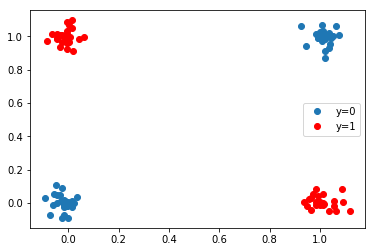

In [7]:
data_set=XOR_Data()
data_set.plot_stuff()

<a id="ref3"></a>
<h2 align=center> One Neuron</h2> 

Create a neural network <code>model</code> with one neuron. Then, use the following code to train it:

In [8]:
model=Net(2,1,1)

Double-click __here__ for the solution.

<!-- 
model=Net(2,1,1)

-->

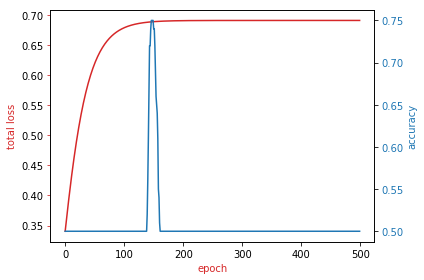

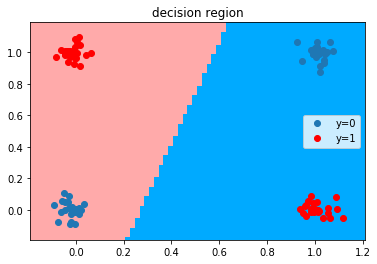

In [9]:

learning_rate=0.001
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=1)
LOSS12=train(data_set,model,criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model,data_set)

<a id="ref3"></a>
<h2 align=center>Two Neurons</h2> 

Create a neural network <code>model</code> with two neurons. Then, use the following code to train it:

In [10]:
model=Net(2,2,1)

Double-click __here__ for the solution.

<!-- 
model=Net(2,2,1)

-->

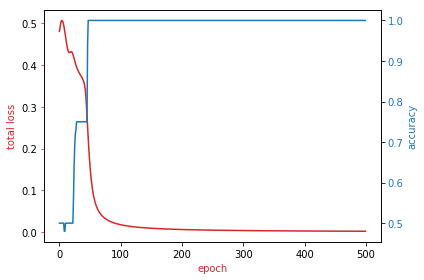

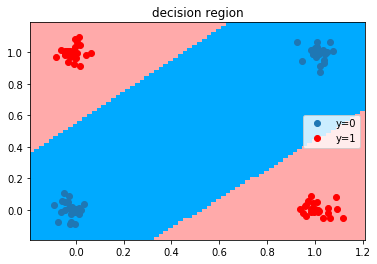

In [11]:

learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=1)
LOSS12=train(data_set,model,criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model,data_set)

<a id="ref4"></a>
<h2 align=center>Three Neurons</h2> 

Create a neural network <code>model</code> with three neurons. Then, use the following code to train it:

In [12]:
model=Net(2,3,1)

Double-click __here__ for the solution.

<!-- 
model=Net(2,3,1)

-->

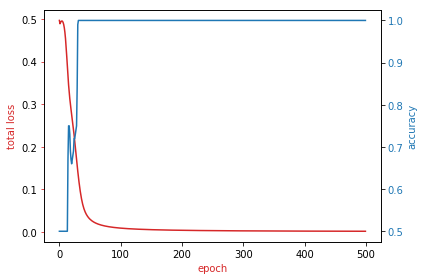

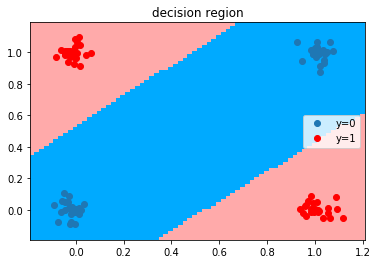

In [13]:

learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=1)
LOSS12=train(data_set,model,criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model,data_set)

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/) ,[Mavis Zhou ]( www.linkedin.com/in/jiahui-mavis-zhou-a4537814a)
      <hr>
Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).